In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_excel("D:\ExcelR\Data Science\Assignments\Forecasting\Airlines.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

### EDA

<Axes: >

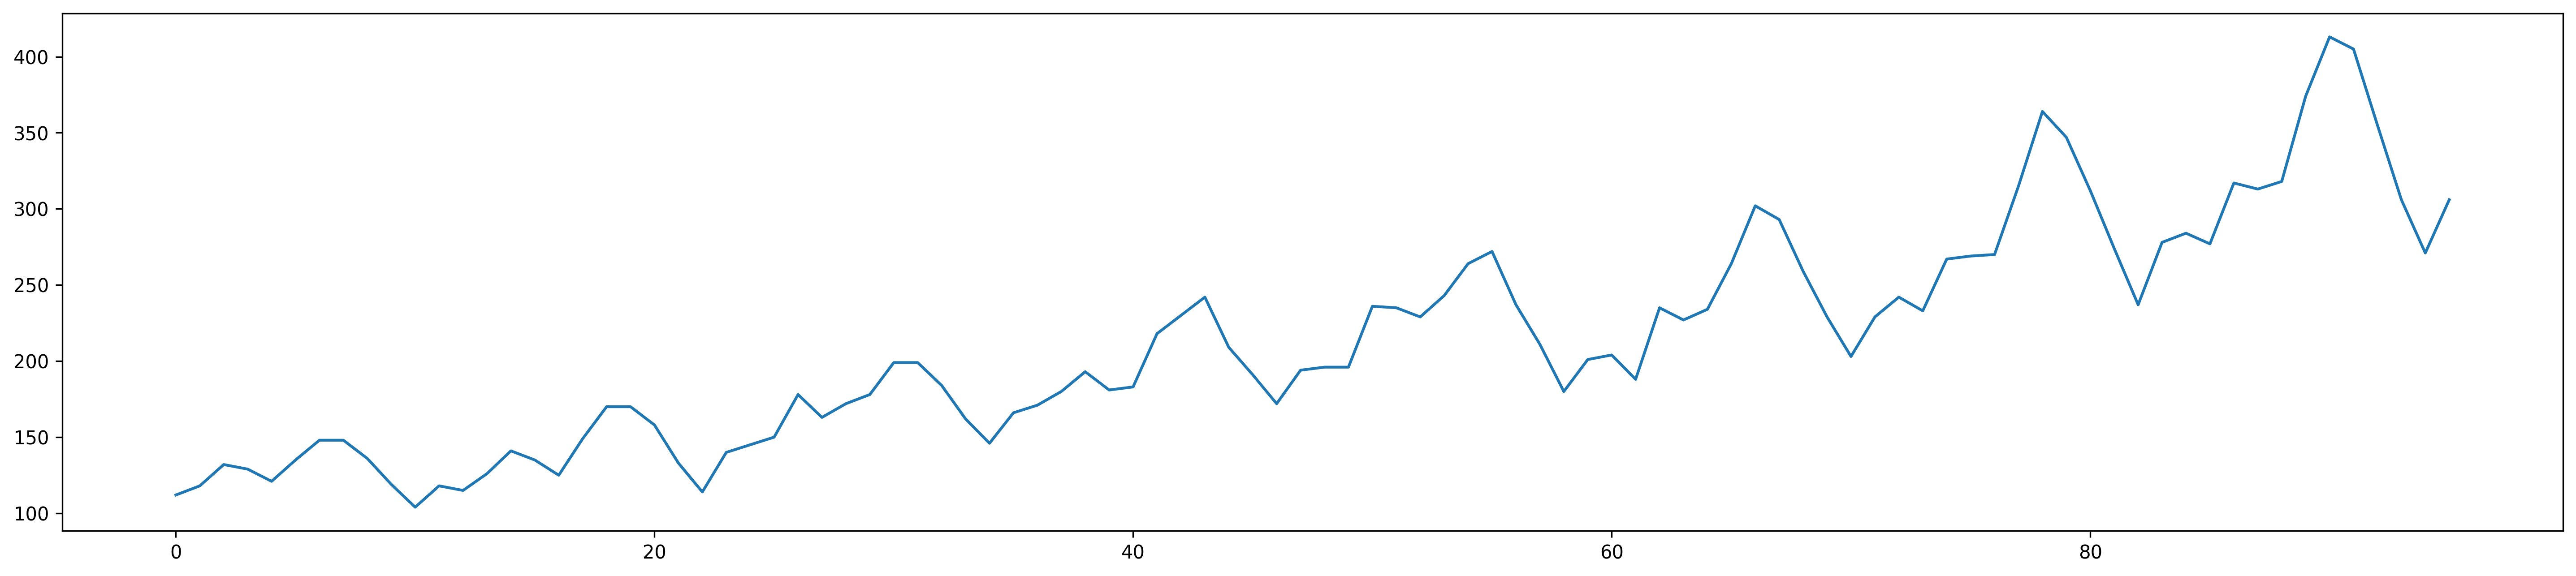

In [6]:
# Line Plot

plt.figure(figsize=(24,5))
df.Passengers.plot()

In [7]:
df['Date'] = pd.to_datetime(df.Month, format="%b-%y")

df['month'] = df.Date.dt.strftime('%b')  #Month extraction
df['year'] = df.Date.dt.strftime('%y')   #Year extraction

In [8]:
df

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,95
1,1995-02-01,118,1995-02-01,Feb,95
2,1995-03-01,132,1995-03-01,Mar,95
3,1995-04-01,129,1995-04-01,Apr,95
4,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02
92,2002-09-01,355,2002-09-01,Sep,02
93,2002-10-01,306,2002-10-01,Oct,02
94,2002-11-01,271,2002-11-01,Nov,02


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   Date        96 non-null     datetime64[ns]
 3   month       96 non-null     object        
 4   year        96 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ KB


<Axes: xlabel='month', ylabel='year'>

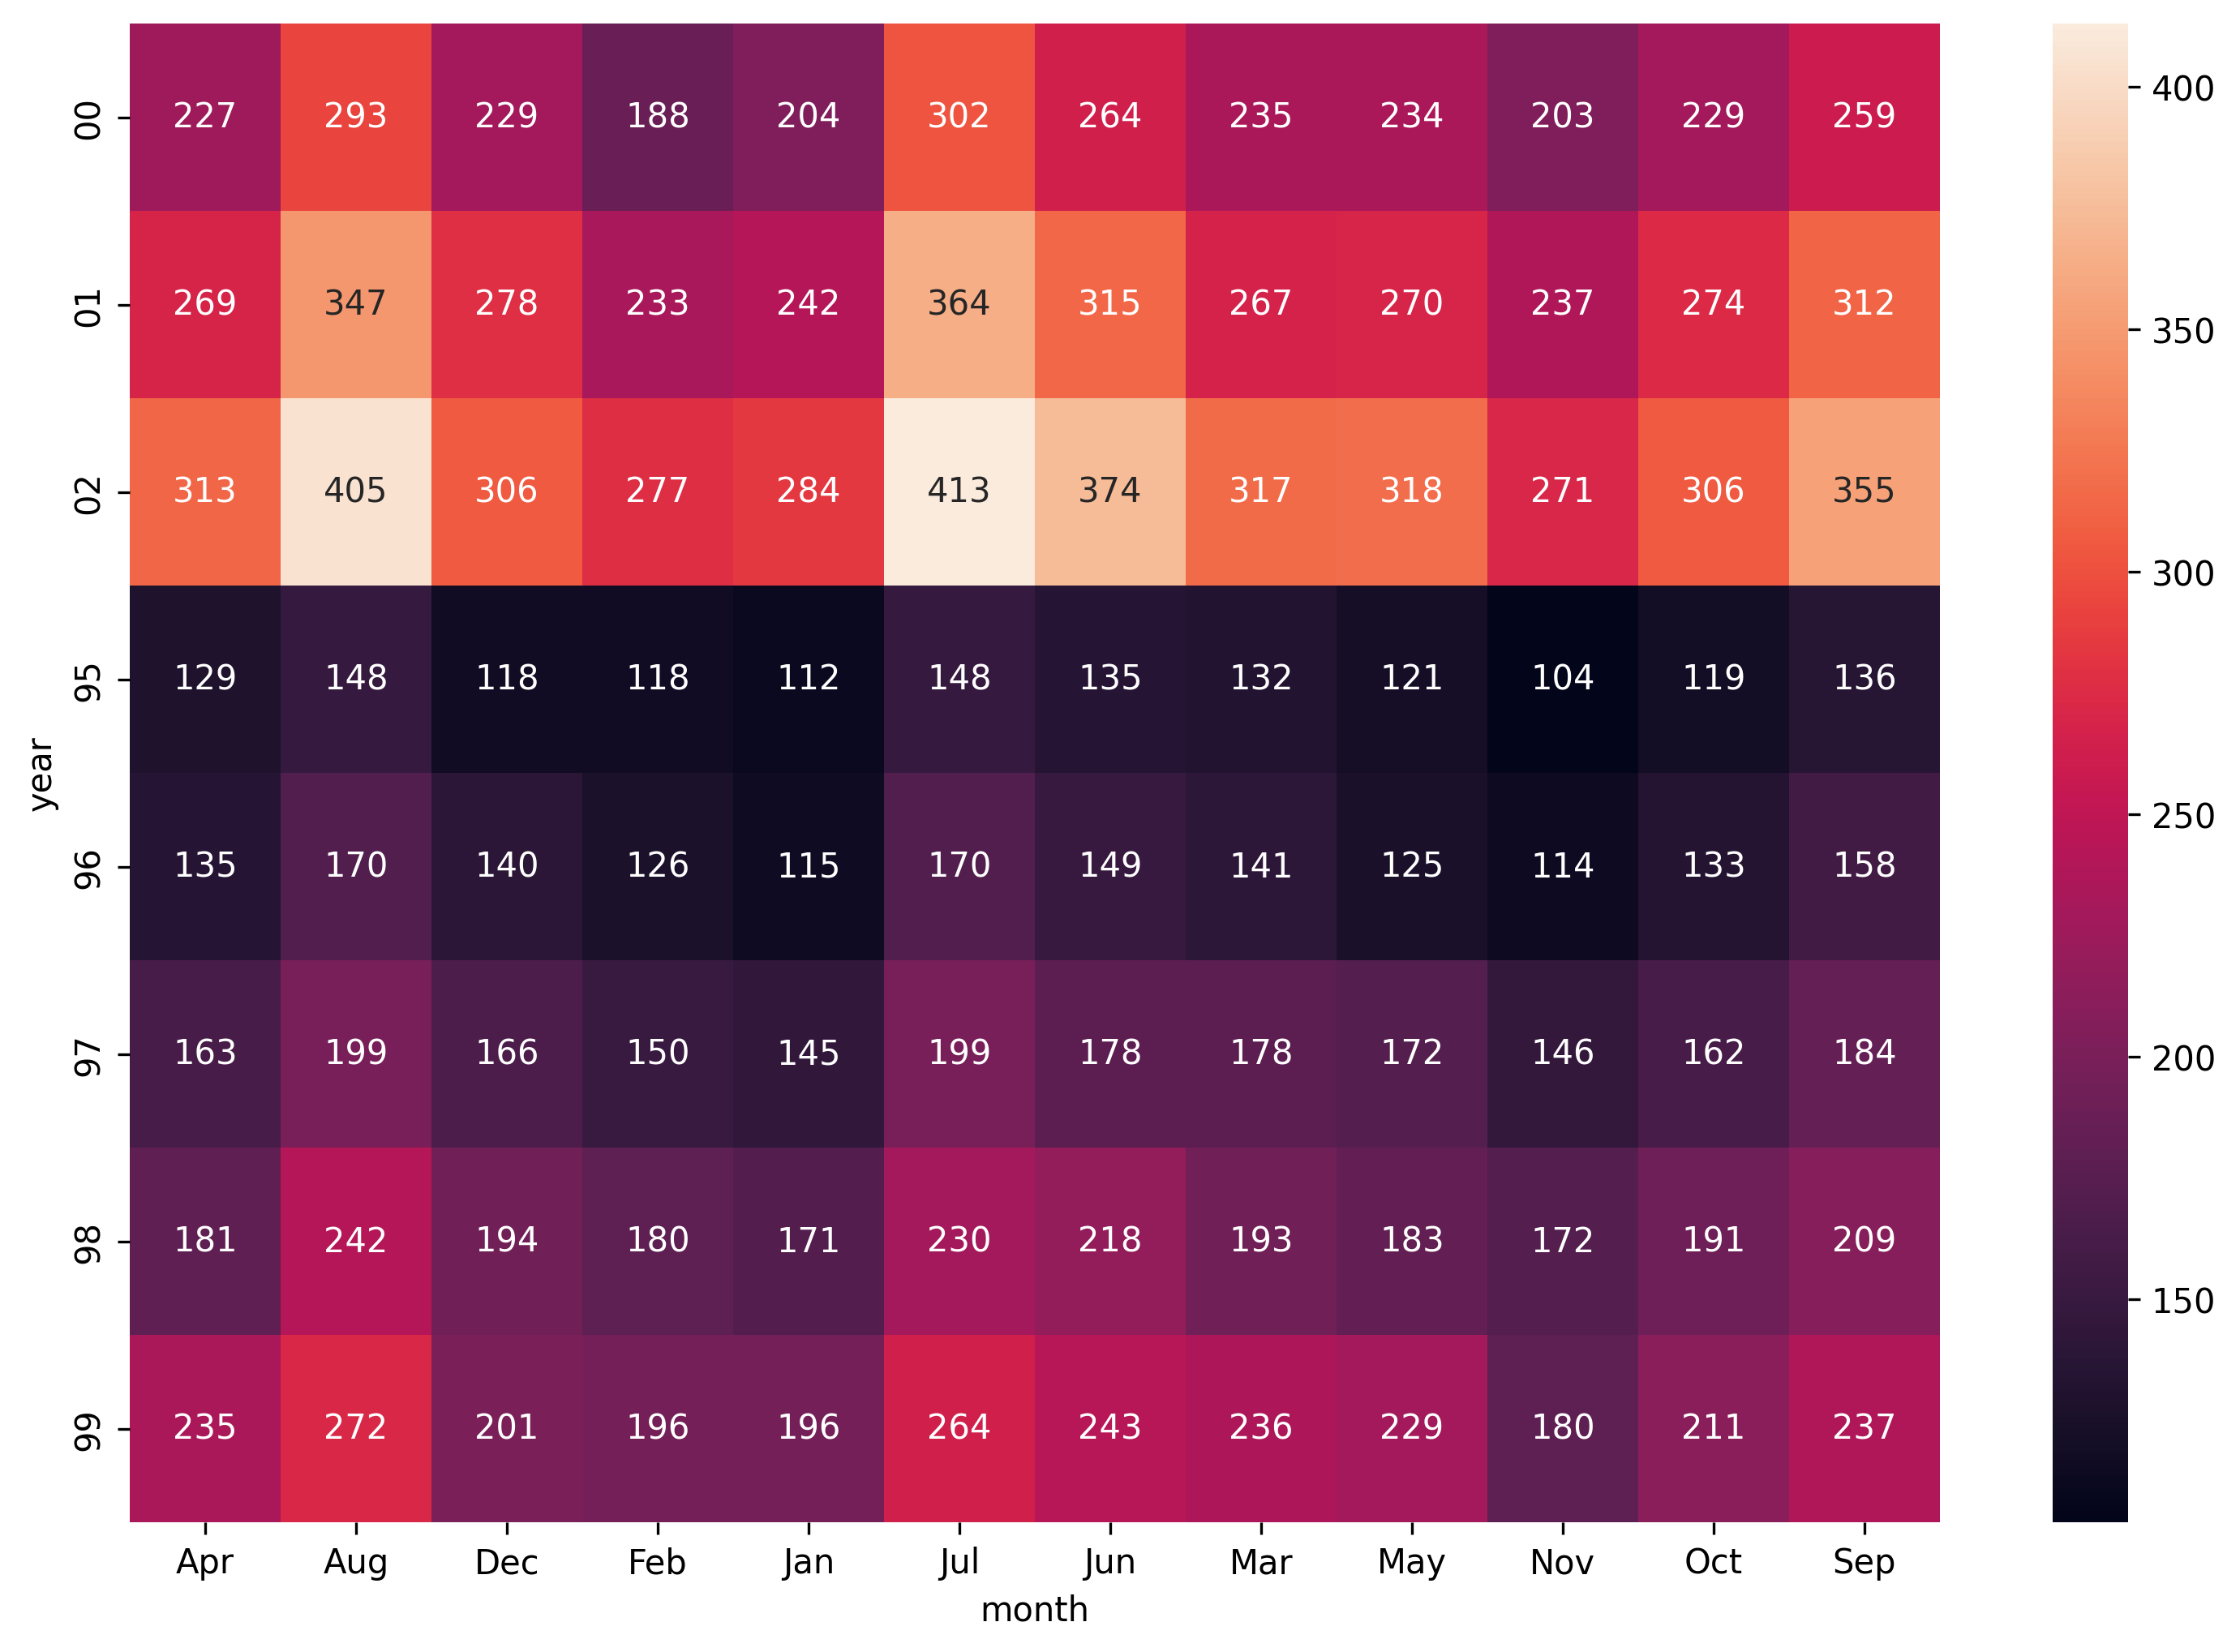

In [10]:
plt.figure(figsize=(12,8))
htmp = pd.pivot_table(data=df, values='Passengers', index='year', columns='month', aggfunc='mean', fill_value=0)
sns.heatmap(htmp,annot=True,fmt='g')

<Axes: xlabel='year', ylabel='Passengers'>

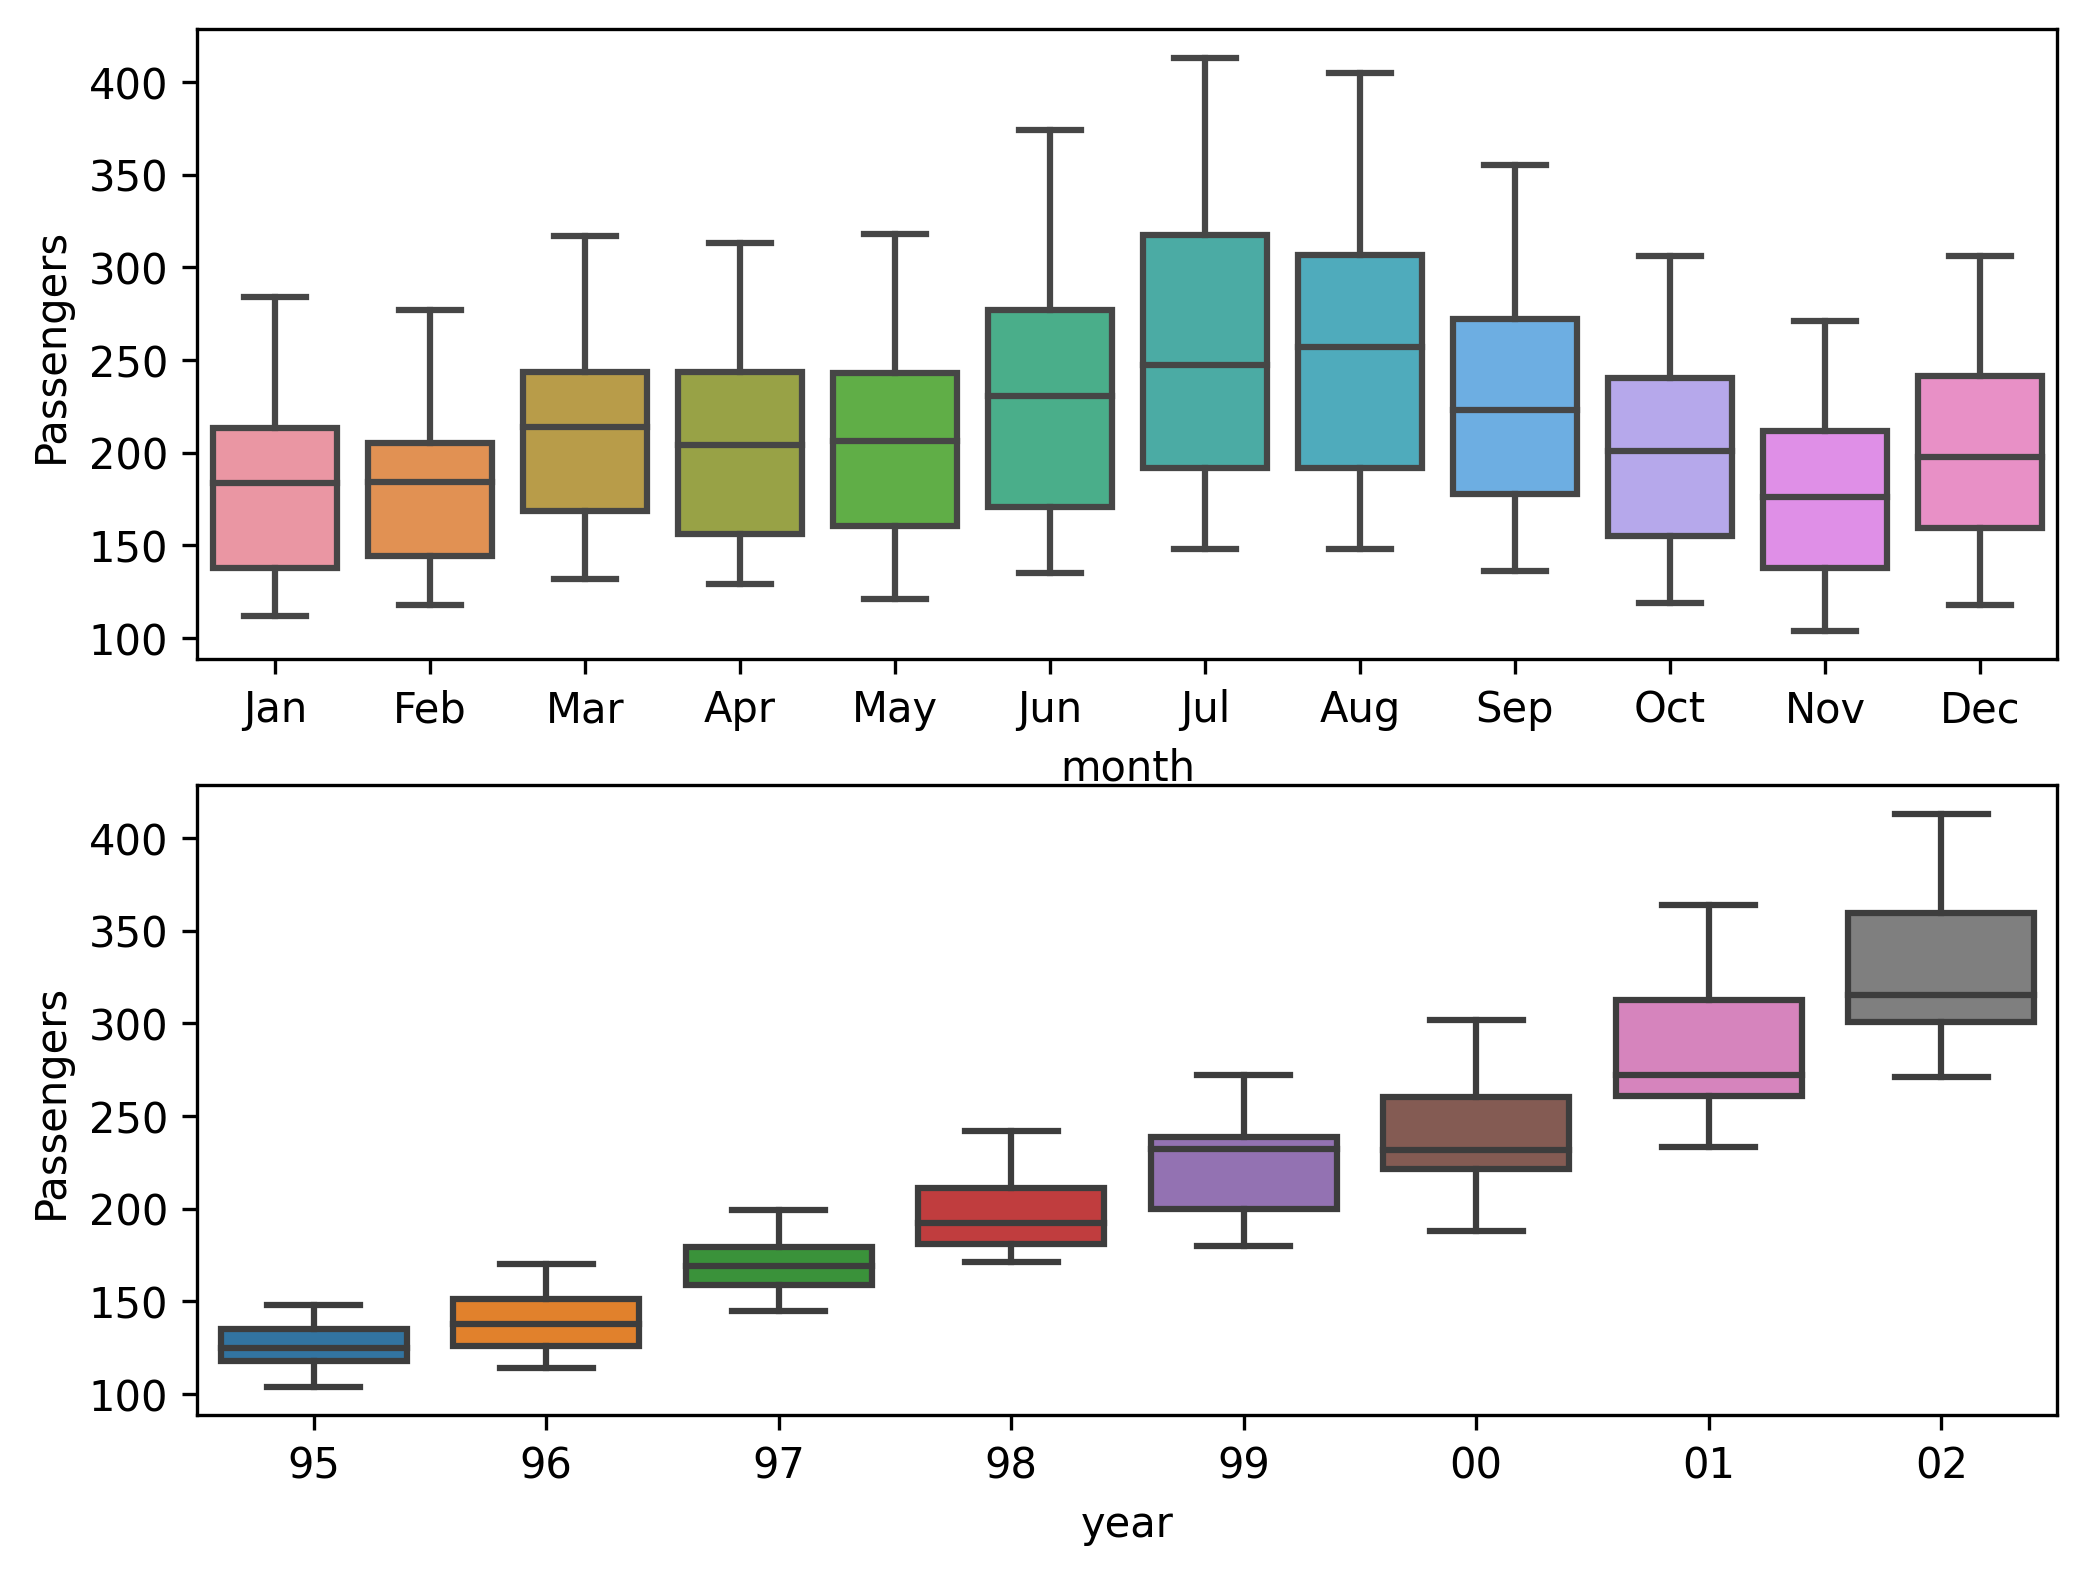

In [11]:
# Boxplot

plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=df)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=df)

<Axes: >

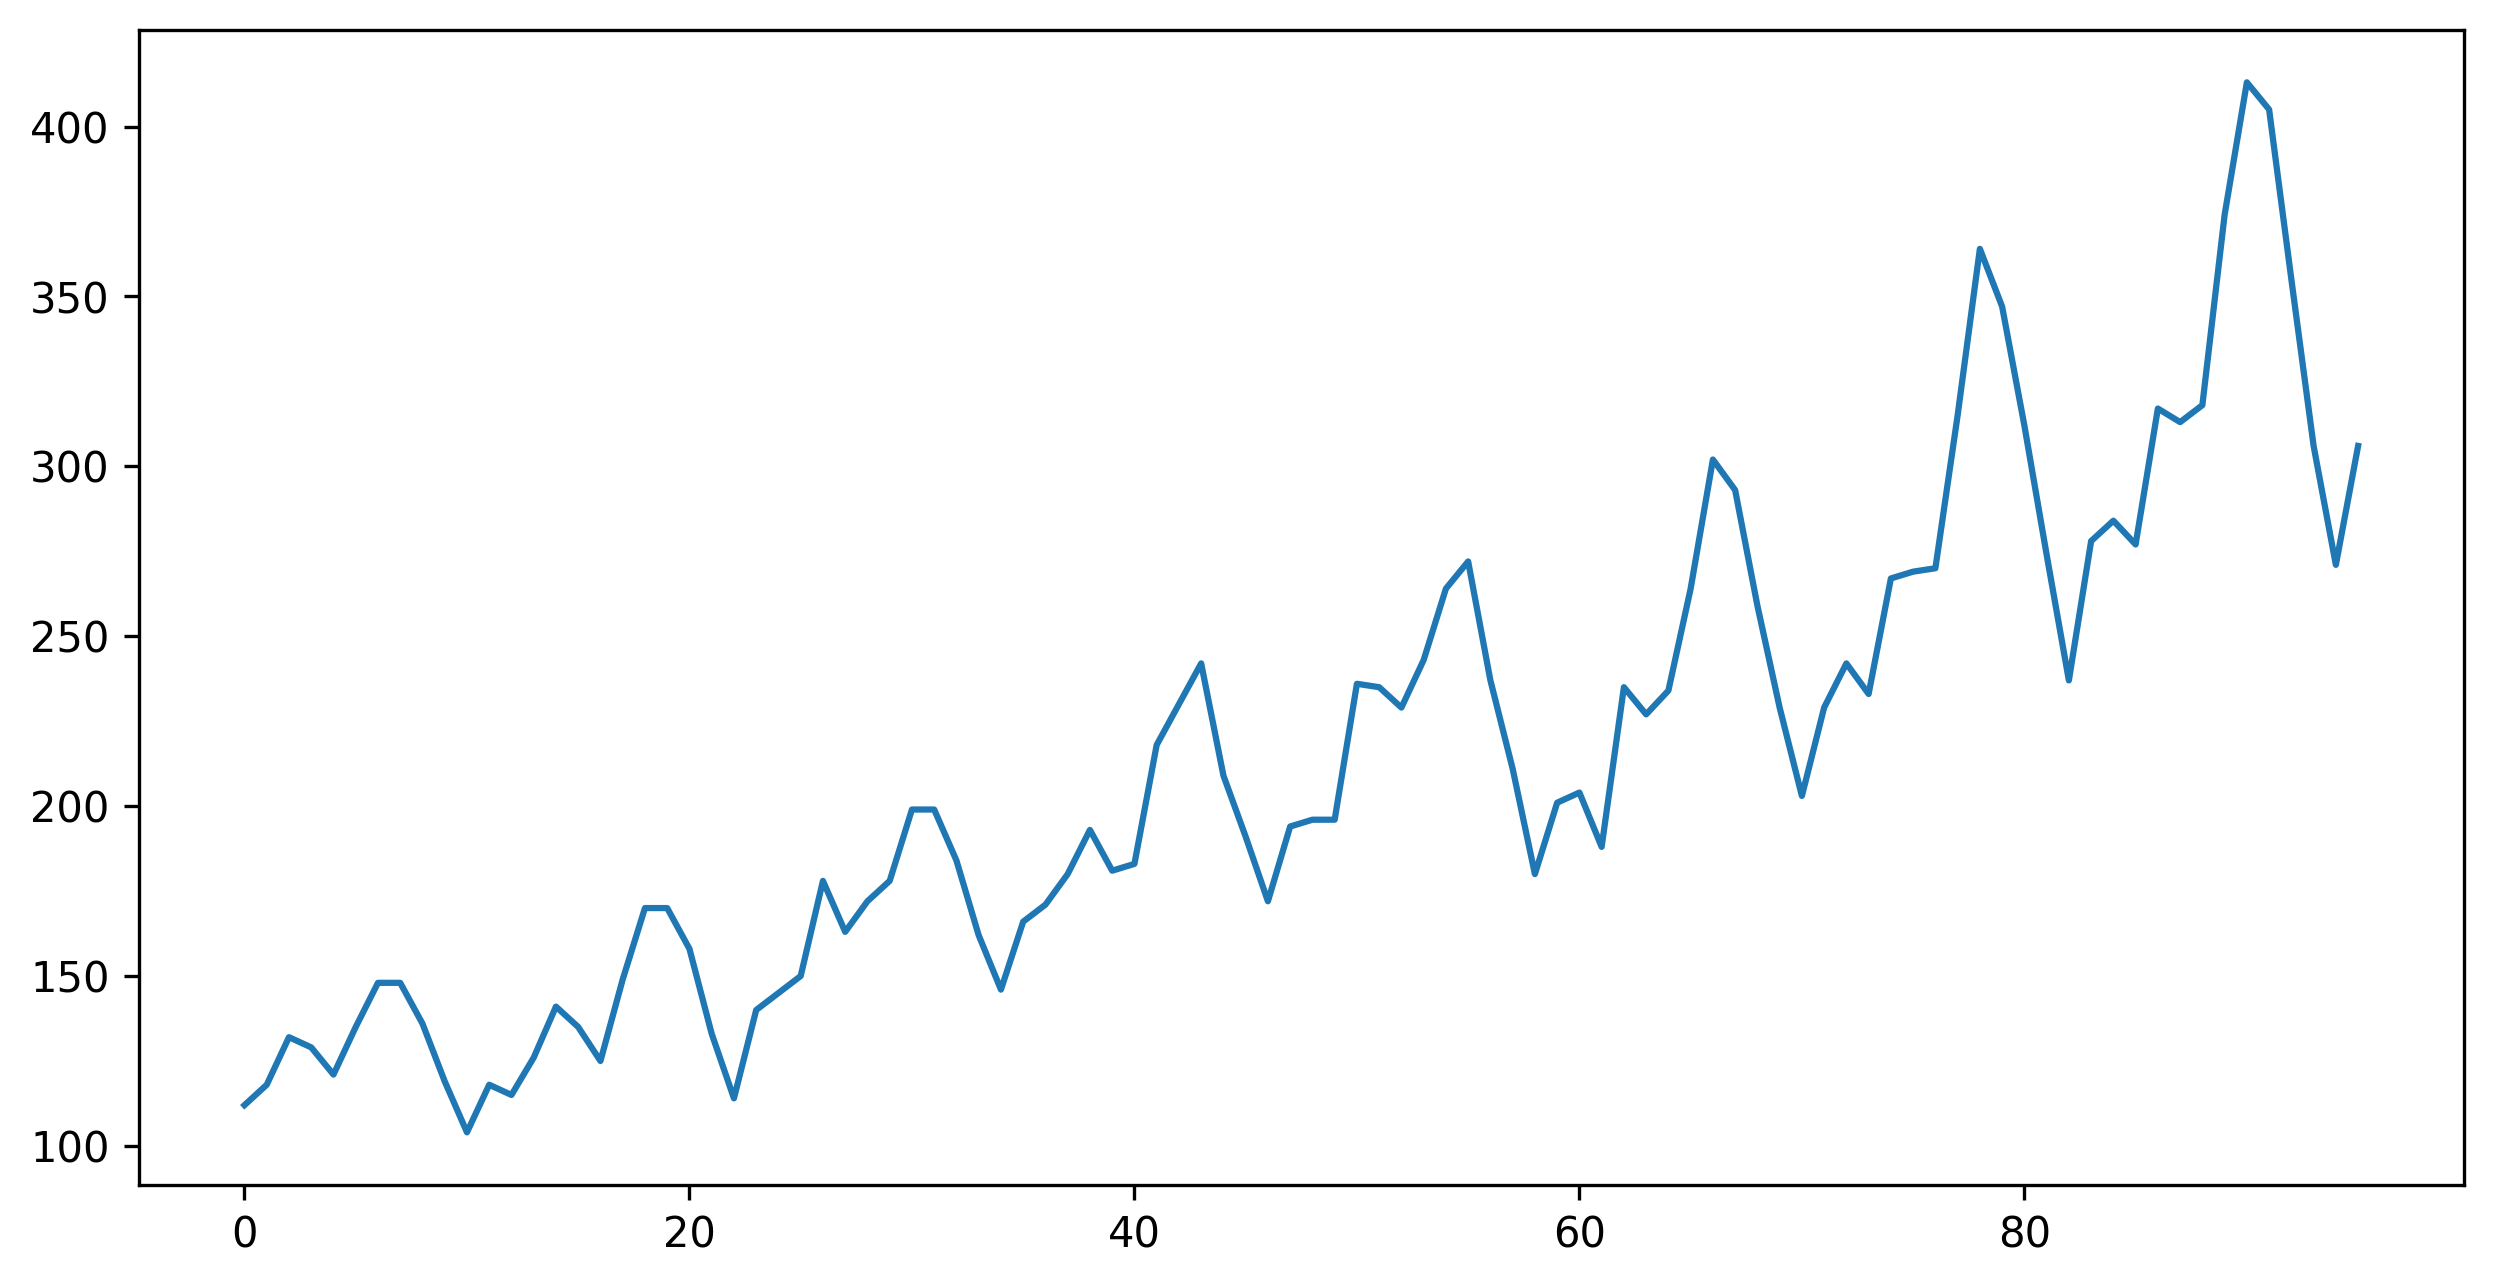

In [12]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

A = df["month"][0]
A[0:3]
df['Month']= 0

for i in range(96):
    A = df["month"][i]
    df['month'][i]= A[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(df['month']))
df1 = pd.concat([df.Passengers, month_dummies], axis = 1)

df1["t"] = np.arange(1,97)

df1["t_square"] = df1["t"] * df1["t"]
df1.columns
df1["log_Passengers"] = np.log(df1["Passengers"])
df1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
df1.Passengers.plot()

In [13]:
df1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<Axes: xlabel='year', ylabel='Passengers'>

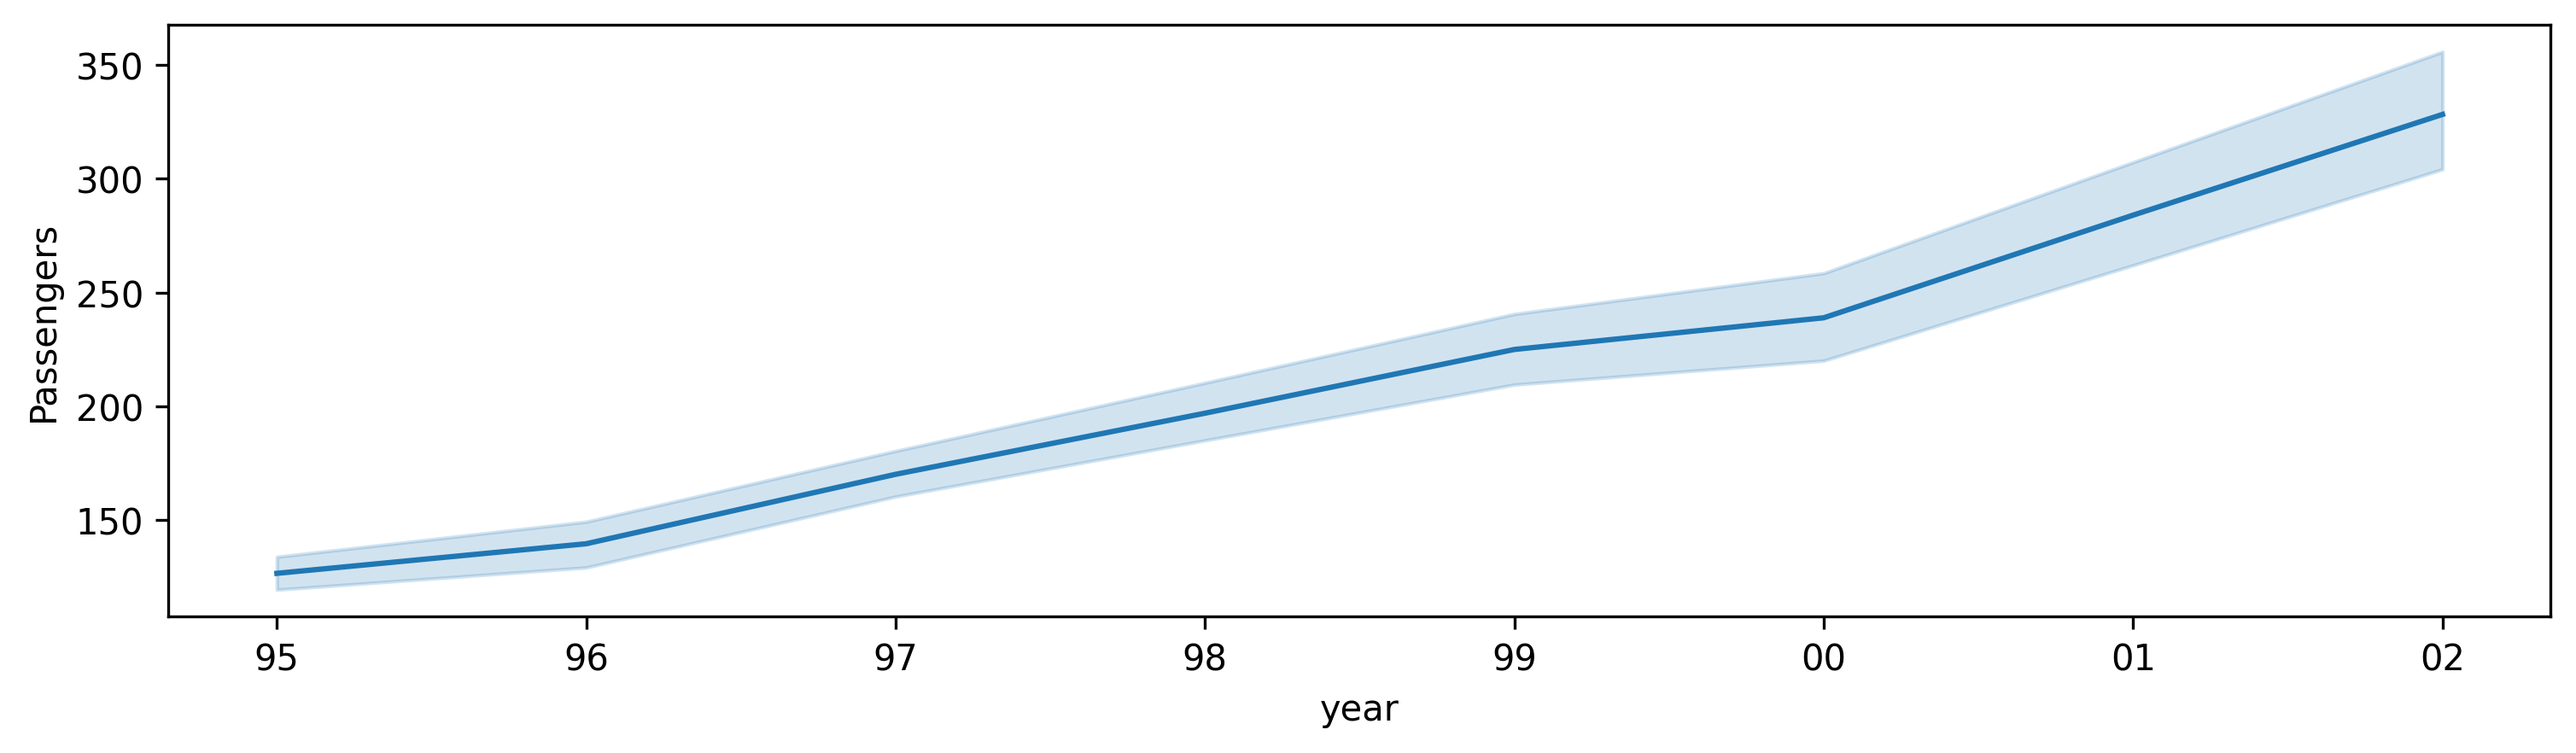

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x='year',y='Passengers',data=df)

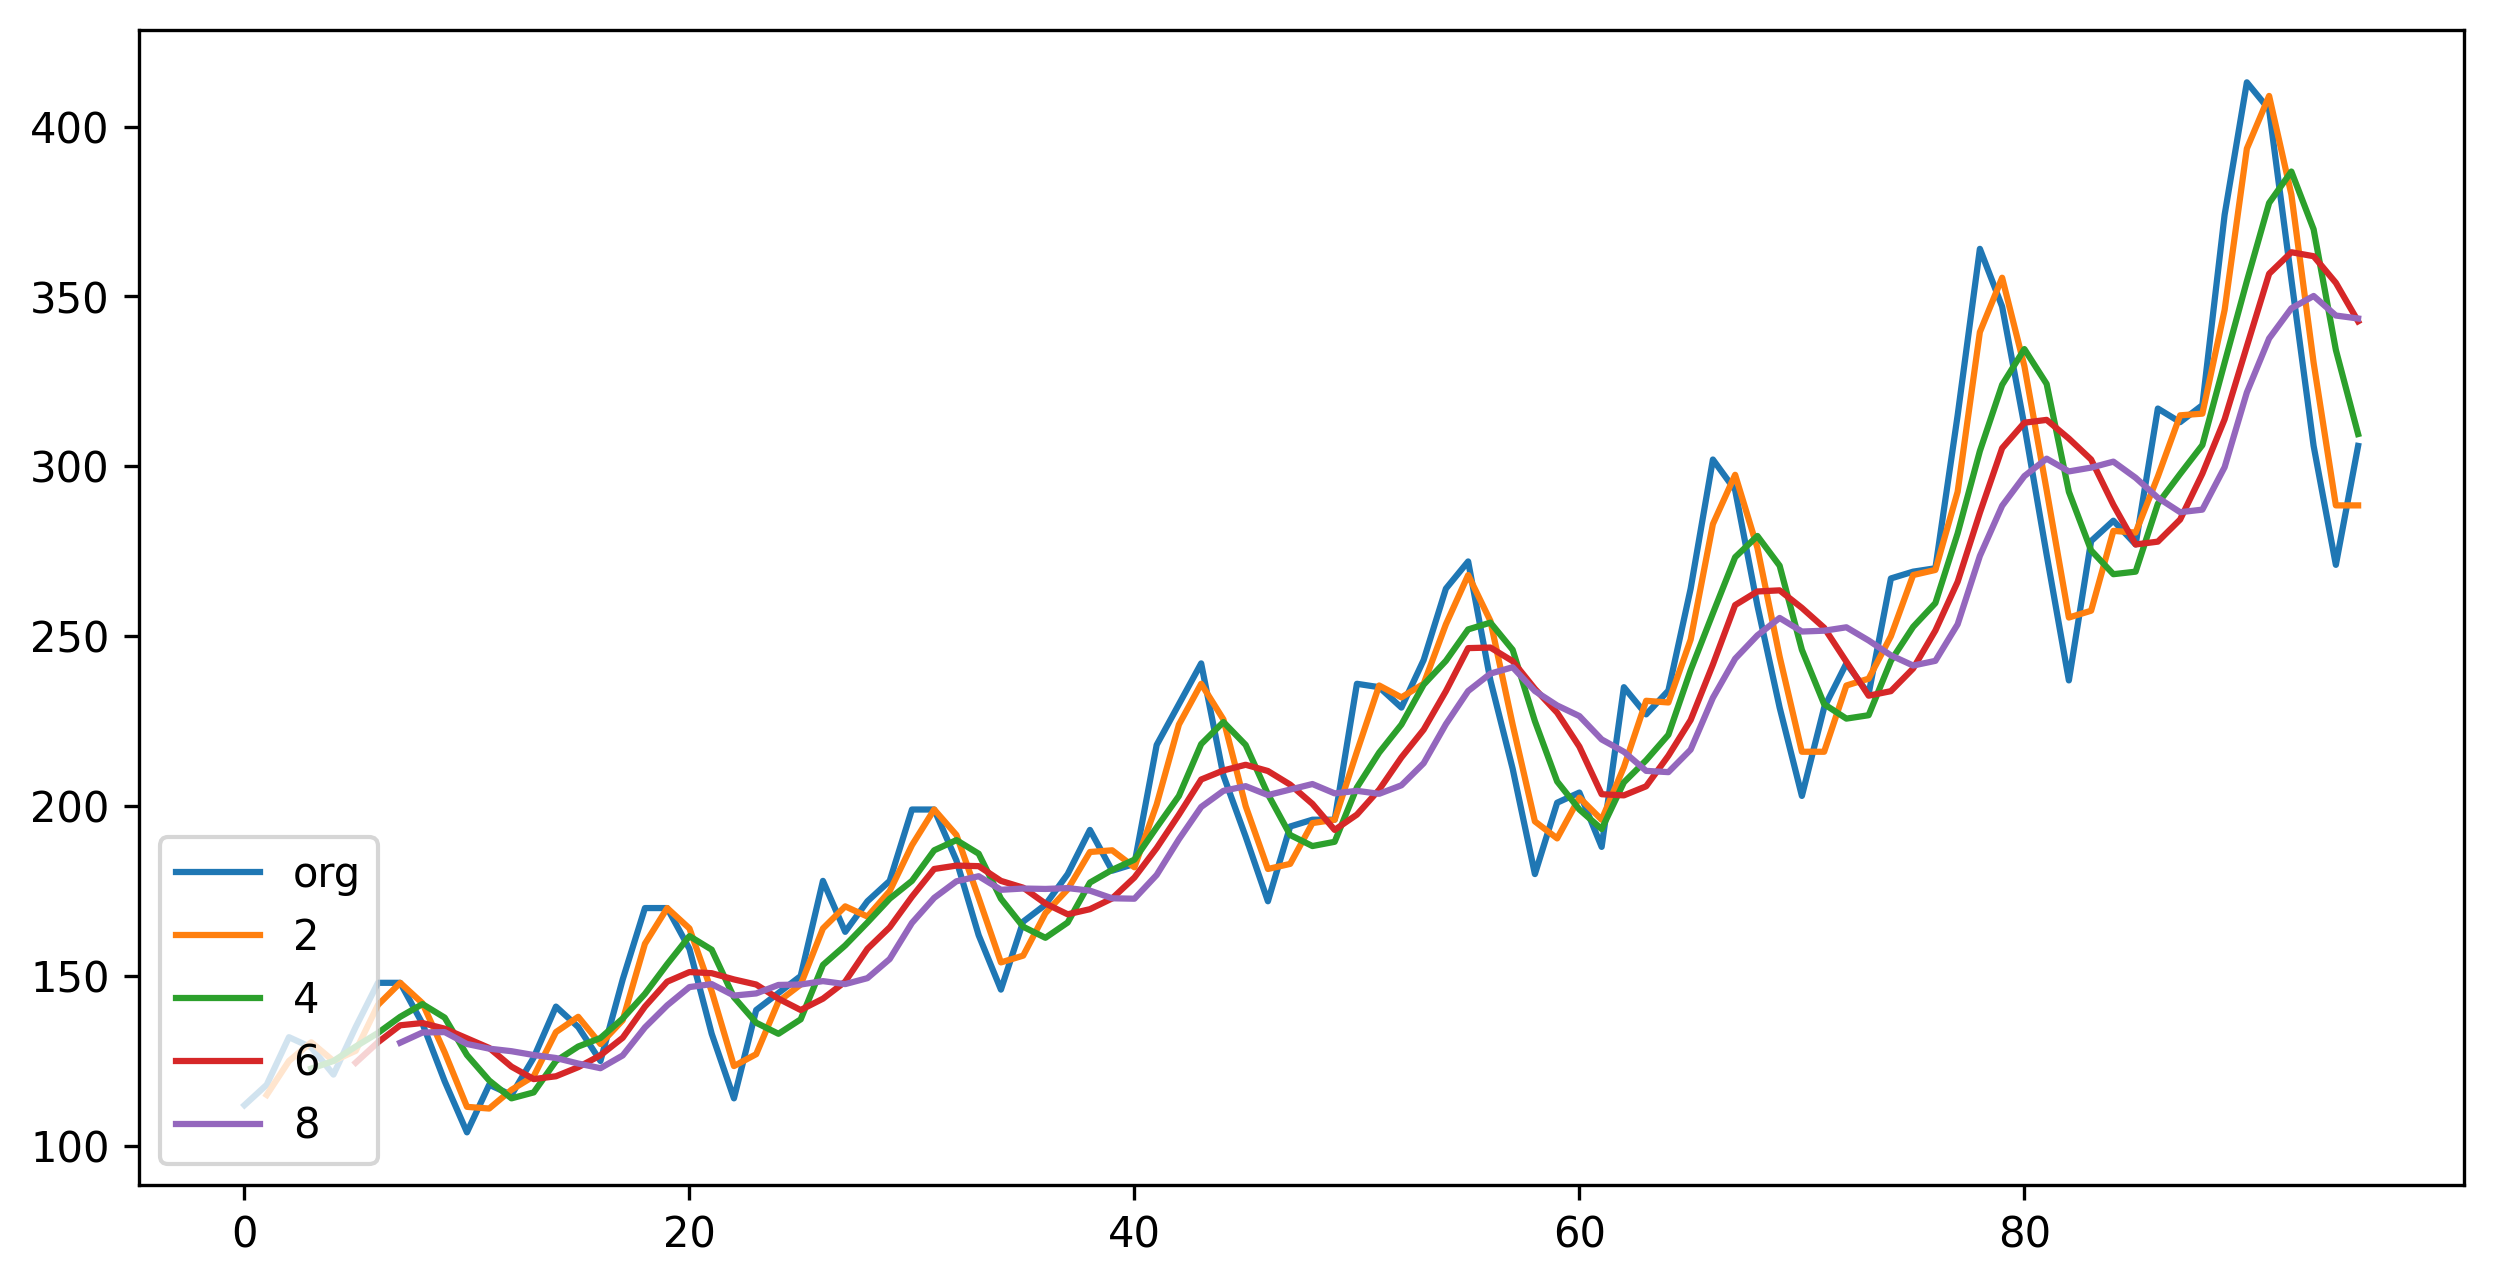

In [15]:
df.Passengers.plot(label="org")

for i in range(2,10,2):
    df["Passengers"].rolling(i).mean().plot(label=str(i))

plt.legend(loc=3)

In [16]:
# Splittinf data into train and test

Train = df1.head(72)
Test = df1.iloc[72:84,:]
predict_data = df1.tail(12)
df2 = df1.iloc[0:84,:]
Train

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,293,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,259,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828
69,229,0,0,0,0,0,0,0,0,0,0,1,0,70,4900,5.433722
70,203,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206


In [17]:
Test

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
72,242,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,233,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,267,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,269,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325
80,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003
81,274,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128


In [18]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


### Model Building

In [19]:
# Linear Model

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Passengers'], pred_linear))
rmse_linear

42.78656082093165

In [20]:
# Exponential

Exp_model = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

38.78176181392993

In [21]:
# Quadratic 

Quad_model = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad_model.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.94925714948836

In [22]:
# Additive seasonality 

Add_sea_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(Add_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

103.11431762854285

In [23]:
# Additive Seasonality Quadratic 

Add_sea_quad_model = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(Add_sea_quad_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

25.481375031759278

In [24]:
# Multiplicative Seasonality

Mul_sea_model = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea_model.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

108.10379108134947

In [25]:
# Multiplicative Additive Seasonality

Mul_add_sea_model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_add_sea_model.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.82042095012237

In [26]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.820421
4,rmse_add_sea_quad,25.481375
1,rmse_Exp,38.781762
0,rmse_linear,42.786561
2,rmse_Quad,42.949257
3,rmse_add_sea,103.114318
5,rmse_Mult_sea,108.103791


In [27]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=df2).fit()

pred_new = pd.Series(Mul_add_sea_model.predict(predict_data))
pred_new

84    5.637978
85    5.662487
86    5.808210
87    5.765280
88    5.753323
89    5.865720
90    5.966763
91    5.975173
92    5.867869
93    5.740788
94    5.611277
95    5.746501
dtype: float64

In [28]:
predict_data["Forecasted_Passengers"] = pd.DataFrame(pred_new)
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,Forecasted_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974,5.637978
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018,5.662487
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902,5.808210
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203,5.765280
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051,5.753323
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256,5.865720
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448,5.966763
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.975173
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.867869
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.740788
